In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

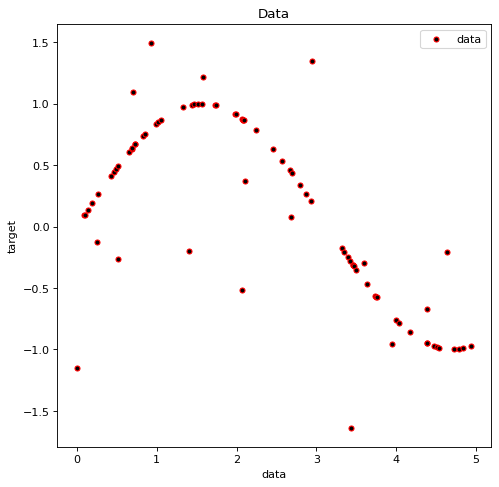

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80,1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3* (0.5 - rng.rand(16))

#plot the results
plt.figure(num = None, figsize=(7,7), dpi=80, facecolor = 'w', edgecolor = 'k')
plt.scatter(X,y, s=20, edgecolor = "red", c= "black", label = "data")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Data")
plt.legend()
plt.show()

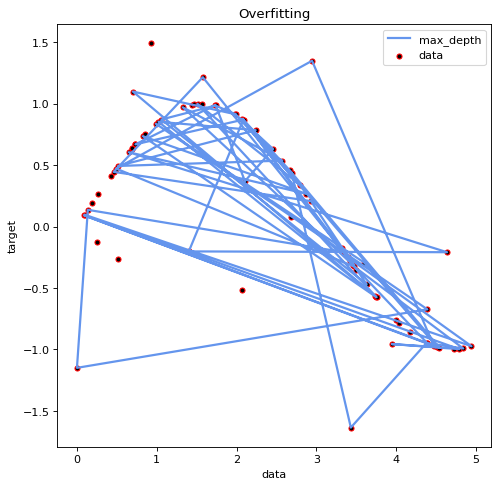

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

#plot the results
plt.figure(num = None, figsize=(7,7), dpi=80, facecolor = 'w', edgecolor = 'k')
plt.scatter(X,y, s=20, edgecolor = "red", c= "black", label = "data")
plt.plot(x_train, y_train, color = "cornflowerblue", label = "max_depth", linewidth = 2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Overfitting")
plt.legend()
plt.show()

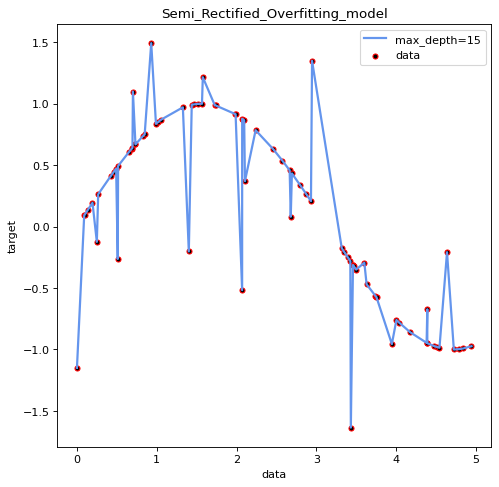

In [ ]:
clf = DecisionTreeRegressor(max_depth=15)
clf.fit(X,y)

#predict
y_1 = clf.predict(X)

#plot the results
plt.figure(num = None, figsize=(7,7), dpi=80, facecolor = 'w', edgecolor = 'k')
plt.scatter(X,y, s=20, edgecolor = "red", c= "black", label = "data")
plt.plot(X,y_1, color = "cornflowerblue", label = "max_depth=15", linewidth = 2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Semi_Rectified_Overfitting_model")
plt.legend()
plt.show()

##K-Fold

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

X = ["S", "D", "A", "I"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
kf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=0)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.862 (0.014)


##Repeated K-Fold

In [ ]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=rkf)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.867 (0.009)


##LEAVE ONE OUT

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# create dataset
X, y = make_blobs(n_samples=100, random_state=0)
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# fit model
	model = RandomForestClassifier(random_state=1)
	model.fit(X_train, y_train)
	# evaluate model
	yhat = model.predict(X_test)
	# store
	y_true.append(y_test[0])
	y_pred.append(yhat[0])
# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.930


##Calculate the Validation score by any two or three given techniques and Validation iterators.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape


((150, 4), (150,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape


clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)



0.9666666666666667

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [ ]:
from sklearn import metrics

scores = cross_val_score(
    clf, X, y, cv=5, scoring = 'f1_macro')
scores



array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

##ROC

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
#import dataset from CSV file on Github
#url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv("model.csv")

#define the predictor variables and the response variable
X = data[['Temp_C', 'Wind Speed_km/h', 'Rel Hum_%']]
y = data['Weather']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
X_train.shape

(4303, 3)

In [ ]:
y_pred_proba.shape

NameError: ignored